# Esercitazione 3

In [2]:
#Librerie necessarie

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

### Introduzione 
Le cartelle contengono i codici utilizzati per la risoluzione degli esercizi e i risultati di ciascun calcolo. Essi verranno analizzati all'interno del notebook, per un controllo del corretto funzionamento del codice è sufficente compilare utilizzando il comando "make run" all'interno di ciascuna sottocartella per ottenere dei nuovi risultati di output

## Es 03.1

L'esercizio prevede l'implementazione di una simulazione Monte Carlo che permetta di valutare il prezzo di una Call Option e una Put Option. Questi due tipi di opzione fanno parte delle European Option le quali sono l'unico tipo di opzioni che possiedono una soluzione analitica per effettuare il loro princing. Il risultato analitico ci è offerto dalla teoria di Black & Scholes la quale assume che l'evoluzione temporale del prezzo di un prodotto finanziario $S(t)$ segua un Moto Browniano Geometrico (GBM) con un tasso di interesse privo di rischio $r$ e volatilità $\sigma$, entrambi costanti.

Di seguito è riportata la soluzione analitica per il pricing di una Call Option e una Put Option per i segunti dati di mercato:

   asset price a $t=0$: $S(0)=100$

   delivery time: $T=1$

   strike price: $K=100$

   risk-free interest rate: $r=0.1$

   volatility: $\sigma=0.25$

In [3]:
import numpy
import scipy
from scipy.special import erf
from numpy import log, exp, sqrt

# data
S0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25
t=0

def N(x):
    return 0.5 * (1. + erf(x / sqrt(2.)))

def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * sqrt(T)) * (log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * sqrt(T)
    C = S0 * N(d1) - K * exp(-r * T) * N(d2)
    P = S0 *(N(d1) - 1.) - K * exp(-r * T) * (N(d2)-1.)
    return C, P

if __name__ == "__main__":
    call, put = black_scholes(S0, K, T, r, sigma)
    print(" == BLACK-SCHOLES ==")
    print("call: ", call)
    print("put: ", put)

 == BLACK-SCHOLES ==
call:  14.975790778311286
put:  5.4595325819072364


Attraverso l'implementazione di una classe è stata simulata l'evoluzione del prezzo di un asset $S(t)$ nel tempo attraverso il campionamento di un Moto Browniano Geometrico $GBM(r,\sigma^2)$ utilizzando la formula ricorsiva:

$$S(t_{i+1}) = S(t_i) \exp\left[ \left(r-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)
    +\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right] \quad \text{con} \quad Z_i \sim \mathcal{N}(0,1)\, .$$
Questo metodo è esatto poichè non vi sono errori di discretizzazione e di conseguenza la sequenza prodotta ha la stessa distribuzione di probabilità congiunta del $GBM$.

Il codice prevede la possibilità di valutare il prezzo di una call-option $C\left[ S(t),t \right]$ e di una put-option $P\left[ S(t),t \right]$ in due maniere differenti:

1) Campionando direttamente il prezzo finale al time to maturity dell' asset $S(T)$

2) Campionando il cammino discretizzato del prezzo dell'asset $S(T)$ dividendo $[0,T]$ in $10^2$ intervelli temporali: $S(0)$, $S(t_1)$, $S(t_2)$, ... fino a $S(t_{100}=T=1)$

Sono state effettuate $M = 10^6$ simulazioni e successivamnete per ottenere il prezzo dell'asset è stato calcolato il valore secondo le formule:

Black-Scholes <span style="color:blue"> analytic solution </span> for the price at time t<T:
- European Call-option price:
$$ C\left[ S(t),t \right] = S(t) N(d_1) -K e^{-r(T-t)} N(d_2) $$
- European Put-option price:
$$ P\left[ S(t),t \right] = S(t) \left[ N(d_1)-1\right] -K e^{-r(T-t)} \left[ N(d_2)-1\right]$$

dove
$$d_1 = \frac{1}{\sigma\sqrt{T-t}}\left[ \ln \left( \frac{S(t)}{K} \right) + \left( r+\frac{\sigma^2}{2} (T-t) \right)\right]$$

e $$d_2 = d_1 - \sigma\sqrt{T-t}$$

e infine
$$ N(x) = \int_{-\infty}^{x} dz \, e^{-\frac{z^2}{2}} = \frac{1}{2} \left[ 1+ {\rm erf} \left( \frac{x}{\sqrt{2}}\right) \right]$$
è la funzione cumulativa della Gaussiana $\sim \mathcal{N}(\mu=0,\sigma^2=1)$,

$${\rm erf}(x) = \frac{2}{\sqrt{\pi}}\int_{0}^{x} dz \, e^{-z^2}$$

Di seguito sono riportati i grafici dei prezzi della call-option e della put-option in funzione del numero di simulazioni con i rispettivi errori (l'analisi dei dati è stata effettuata tramite il metodo del data blocking). In un unico grafico sono riportati i risulati ottenuti da entrambi i metodi di campionamento ed il risulato analitico per effettuare un confronto.

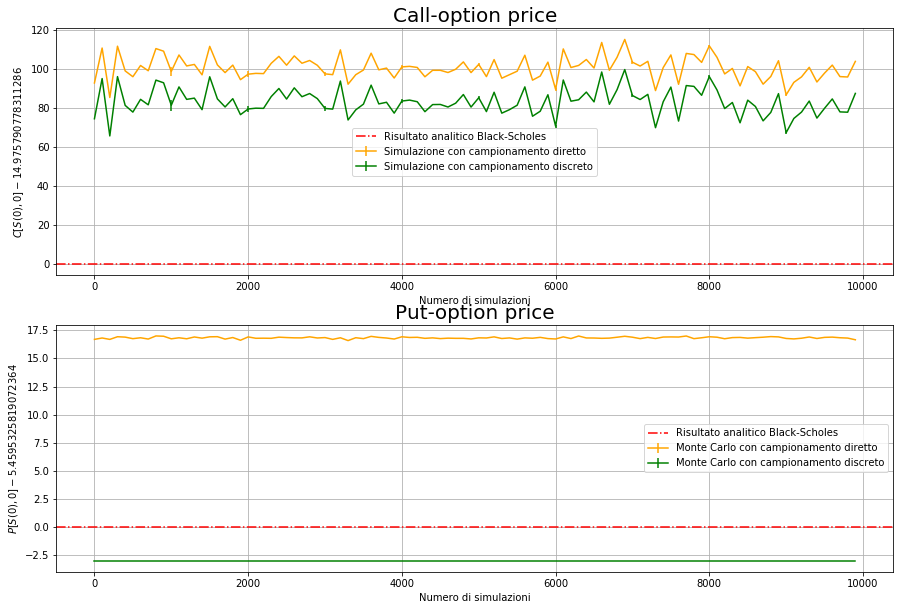

In [4]:
plt.figure(figsize=(15,10))

plt.subplot(2,1,1)
x, y, error = np.loadtxt('3/riscalldirette.out', usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x, y - 14.975790778311286, yerr=error,errorevery = 10, label = 'Simulazione con campionamento diretto', color = 'orange')
plt.axhline(y=0,linestyle='-.',color = 'red',label = 'Risultato analitico Black-Scholes')
x, y, error = np.loadtxt('3/riscallastep.out', usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x, y - 14.975790778311286, yerr=error,errorevery = 10,label = 'Simulazione con campionamento discreto',color = 'green')
plt.xlabel('Numero di simulazioni')
plt.ylabel('$C[S(0),0] - 14.975790778311286$')
plt.title('Call-option price', fontsize=20)
plt.legend()
plt.grid(True)

plt.subplot(2,1,2)
x, y, error = np.loadtxt('3/risputdirette.out', usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x, y - 5.4595325819072364, yerr=error,errorevery = 10, label = 'Monte Carlo con campionamento diretto', color = 'orange')
plt.axhline(y=0,linestyle='-.',color = 'red',label = 'Risultato analitico Black-Scholes')
x, y, error = np.loadtxt('3/risputastep.out', usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x,y - 5.4595325819072364, yerr=error, errorevery = 10,label = 'Monte Carlo con campionamento discreto',color = 'green')
plt.xlabel('Numero di simulazioni')
plt.ylabel('$P[S(0),0] - 5.4595325819072364$')
plt.title('Put-option price', fontsize = 20)

plt.legend()
plt.grid(True)
plt.show()


Come si evince dai grafici entrambi i metodi utilizzati non convergono alla soluzione analitica entro gli errori,ma risulta un offset molto marcato. Inoltre si può notare che il metodo del campionamento discreto mostra una minore campatibilità con il risultato atteso, soprattutto nel caso delle Call, e ciò è in controtendenza con la teoria poichè mi aspetto una minore incertezza statistica in questo caso. 
La causa degli errori nel calcolo potrebbe essere ricondotta a uno scorretto utilizzo delle funzioni, tuttavia dall'analisi dei valori ricavati dai singoli step non risultano evidenti.